In [ ]:
#Basic libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

#warning
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Load the data.
data = pd.read_csv("/content/Full-Economic-News-DFE-839861.csv", encoding = "ISO-8859-1")

In [ ]:
#Lets have a look of dataset.
data.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,positivity,positivity:confidence,relevance,relevance:confidence,articleid,date,headline,positivity_gold,relevance_gold,text
0,842613455,False,finalized,3,12/5/15 17:48,3.0,0.6400,yes,0.640,wsj_398217788,8/14/91,Yields on CDs Fell in the Latest Week,NaN,NaN,NEW YORK -- Yields on most certificates of dep...
1,842613456,False,finalized,3,12/5/15 16:54,NaN,NaN,no,1.000,wsj_399019502,8/21/07,The Morning Brief: White House Seeks to Limit ...,NaN,NaN,The Wall Street Journal Online</br></br>The Mo...
2,842613457,False,finalized,3,12/5/15 1:59,NaN,NaN,no,1.000,wsj_398284048,11/14/91,Banking Bill Negotiators Set Compromise --- Pl...,NaN,NaN,WASHINGTON -- In an effort to achieve banking ...
3,842613458,False,finalized,3,12/5/15 2:19,NaN,0.0000,no,0.675,wsj_397959018,6/16/86,Manager's Journal: Sniffing Out Drug Abusers I...,NaN,NaN,The statistics on the enormous costs of employ...
4,842613459,False,finalized,3,12/5/15 17:48,3.0,0.3257,yes,0.640,wsj_398838054,10/4/02,Currency Trading: Dollar Remains in Tight Rang...,NaN,NaN,NEW YORK -- Indecision marked the dollar's ton...


In [ ]:
#size of the data
data.shape

(8000, 15)

In [ ]:
#Text and Relevance are the only usefull columns here, Also Relevance is target.
data.relevance.value_counts()/len(data)

no          0.821375
yes         0.177500
not sure    0.001125
Name: relevance, dtype: float64

- Excluding not sure sub class seems fine as containing very less records.


In [ ]:
#Removing and Create seperate dataset
df = data.loc[data["relevance"] != "not sure", "text"]
target = data.loc[data["relevance"] != "not sure", "relevance"]

In [ ]:
#Mapping the target.
target = target.map({"yes":1, "no":0})
target.head()

0    1
1    0
2    0
3    0
4    1
Name: relevance, dtype: int64

In [ ]:
df[0]

'NEW YORK -- Yields on most certificates of deposit offered by major banks dropped more than a tenth of a percentage point in the latest week, reflecting the overall decline in short-term interest rates.</br></br>On small-denomination, or "consumer," CDs sold directly by banks, the average yield on six-month deposits fell to 5.49% from 5.62% in the week ended yesterday, according to an 18-bank survey by Banxquote Money Markets, a Wilmington, Del., information service.</br></br>On three-month "consumer" deposits, the average yield sank to 5.29% from 5.42% the week before, according to Banxquote. Two banks in the Banxquote survey, Citibank in New York and CoreStates in Pennsylvania, are paying less than 5% on threemonth small-denomination CDs.</br></br>Declines were somewhat smaller on five-year consumer CDs, which eased to 7.37% from 7.45%, Banxquote said.</br></br>Yields on three-month and six-month Treasury bills sold at Monday\'s auction plummeted more than a fifth of a percentage po

- There is lot of "<br\>" and numbers appearing which needs to be cleaned first.

In [ ]:
#need stopwords
import string
from sklearn.feature_extraction import _stop_words
from sklearn.feature_extraction.text import CountVectorizer

#Lets make a preprocessing function and will use while tokenization of text.
stopwords = _stop_words.ENGLISH_STOP_WORDS
def clean(doc):
  #replace <br/> with " ".
  doc = doc.replace("</br>", " ")
  #remove punctiation and numbers
  doc = "".join([char for char in doc if char is not string.punctuation and not char.isdigit()])
  #split the row and remove stopwords.
  doc = " ".join([token for token in doc.split() if token not in  stopwords])

  return doc

In [ ]:
#splitting.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42)
print(f"train size: {X_train.shape}, test_size: {X_test.shape}")

train size: (6392,), test_size: (1599,)


In [ ]:
#Vectorizing the data.
vec = CountVectorizer(preprocessor=clean)
vec.fit(X_train)

#Creating tokenized dataset
X_train_vec = vec.transform(X_train)
X_test_vec = vec.transform(X_test)

In [ ]:
#Lets check the vocab
print(f"Num of tokens: {len(vec.vocabulary_)}")
print(vec.vocabulary_)

Num of tokens: 44052
{'It': 7389, 'usually': 41363, 'doesn': 23001, 'happen': 26610, 'quickly': 34424, 'Washington': 15582, 'But': 2094, 'President': 11479, 'Barack': 1261, 'Obama': 10482, 'congressional': 20701, 'Democrats': 3940, 'finding': 25065, 'old': 31857, 'maxim': 30193, 'goes': 26171, 'around': 17424, 'comes': 20303, 'applies': 17294, 'them': 39631, 'too': 40043, 'Less': 8494, 'months': 30821, 'term': 39524, 'Mr': 9851, 'initiatives': 28033, 'health': 26754, 'care': 19364, 'reform': 35064, 'cap': 19313, 'trade': 40177, 'energy': 23859, 'legislation': 29278, 'jeopardy': 28672, 'allies': 16897, 'blame': 18451, 'Their': 14531, 'high': 26911, 'pressure': 33749, 'tactics': 39205, 'promoting': 34034, 'passing': 32637, 'notably': 31526, 'economic': 23486, 'stimulus': 38371, 'enacted': 23789, 'February': 5175, 'backfired': 17864, 'Those': 14582, 'include': 27737, 'unbridled': 40728, 'partisanship': 32616, 'procedural': 33890, 'short': 37047, 'cuts': 21574, 'demands': 22047, 'swift': 3

In [ ]:
#Shape of data.
print(f"train size: {X_train_vec.shape}, test_size: {X_test_vec.shape}")

train size: (6392, 44052), test_size: (1599, 44052)


# Modelling.
- Will use NaiveBayes as the base model for performance comparison of other models.
- Confusion metric and accuracy is used as evaluation param.

In [ ]:
#libs
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score

#Creating a func for Evaluation of the model performance.
def Evaluation(y_test, y_pred, classes=[]):
  #Accuracy
  print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
  print(f"Recall: {recall_score(y_test, y_pred)}")
  print(f"Precision: {precision_score(y_test, y_pred)}")
  print(f"F1 score: {f1_score(y_test, y_pred)}")

  #Plotting confusion metric.
  cm = confusion_matrix(y_test, y_pred, normalize="true")
  plt.figure(figsize=(8,5))
  sns.heatmap(cm,fmt='.2%',cmap="Blues",annot=True)
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  plt.show()


In [ ]:
#Train - (X_train_vec, y_train), test - X_test
#Base model - NaiveBayes
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train_vec, y_train)

#prediction.
y_pred = nb.predict(X_test_vec)

Accuracy: 0.7535959974984365


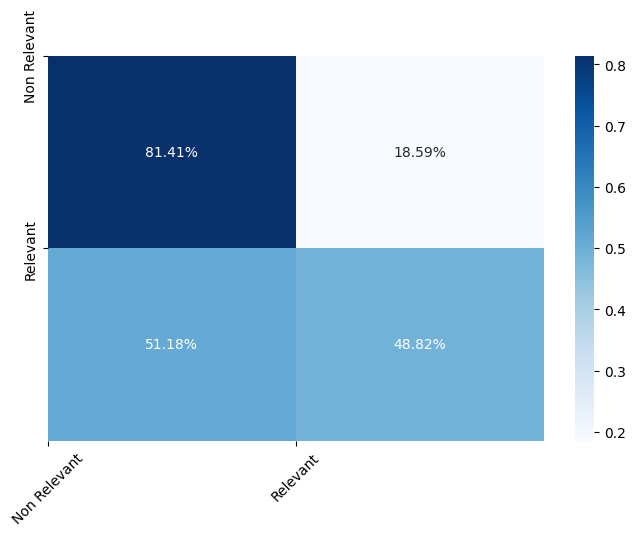

In [ ]:
#Evaluating
Evaluation(y_test, y_pred, ["Non Relevant", "Relevant"])

- missclassification rate of Relevant labels are very high
  - Imbalance in data can be one of the cause.
  - very high dimensional sparse matrix can also be a reason
  - Mainly traditional model suffers from such reasons.

In [ ]:
#Lets try reducing dims and check again.
vec = CountVectorizer(preprocessor=clean, max_features=8000)
vec.fit(X_train)

#Transforming
X_train_vec = vec.transform(X_train)
X_test_vec = vec.transform(X_test)

In [ ]:
print(f"train shape: {X_train_vec.shape}, test shape: {X_test_vec.shape}")

train shape: (6392, 8000), test shape: (1599, 8000)


In [ ]:
#Modelling
nb = MultinomialNB()
nb.fit(X_train_vec, y_train)

#prediction
y_pred = nb.predict(X_test_vec)

Accuracy: 0.691682301438399


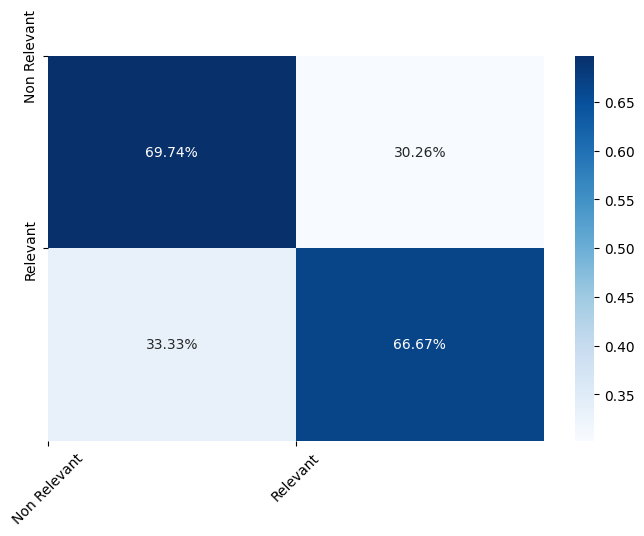

In [ ]:
#evaluation
Evaluation(y_test, y_pred, ["Non Relevant", "Relevant"])

- Now the proportion of correct classification looks more generalised.
- Lets see how other models perform.

In [ ]:
# LogisticRegression.
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, class_weight="balanced")
lr.fit(X_train_vec, y_train)

#prediction
y_pred = lr.predict(X_test_vec)

Accuracy: 0.7348342714196373


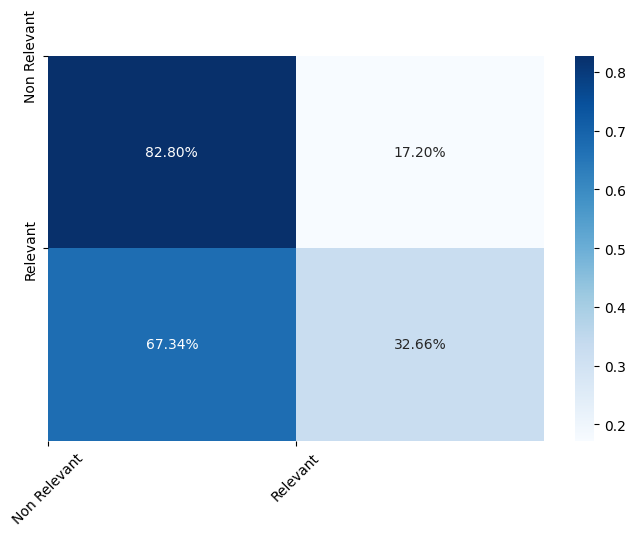

In [ ]:
#evaluation
Evaluation(y_test, y_pred, ["Non Relevant", "Relevant"])

- Clearly LogisticRegression is unable to perform well for high dims sparse data.

In [ ]:
#SVM
from sklearn.svm import SVC

sv = SVC(class_weight="balanced")
sv.fit(X_train_vec, y_train)

#prediction
y_pred = sv.predict(X_test_vec)

Accuracy: 0.7804878048780488


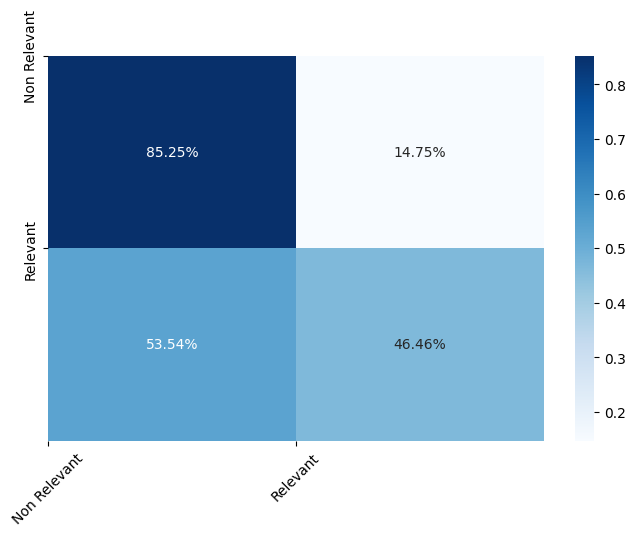

In [ ]:
#evaluation
Evaluation(y_test, y_pred, ["Non Relevant", "Relevant"])

- Better than LogisticRegression but still very poor performance.

In [ ]:
#Decision Tree.
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion="gini",class_weight="balanced")
dt.fit(X_train_vec, y_train)

#prediction
y_pred = dt.predict(X_test_vec)

Accuracy: 0.7317073170731707


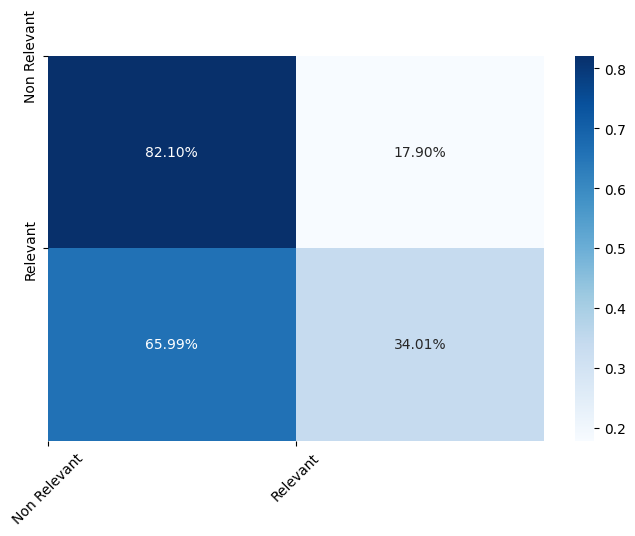

In [ ]:
#evaluation
Evaluation(y_test, y_pred, ["Non Relevant", "Relevant"])

In [ ]:
#LinearSVC
from sklearn.svm import LinearSVC

sv = LinearSVC(class_weight="balanced")
sv.fit(X_train_vec, y_train)

#Prediction
y_pred = sv.predict(X_test_vec)

Accuracy: 0.7323327079424641


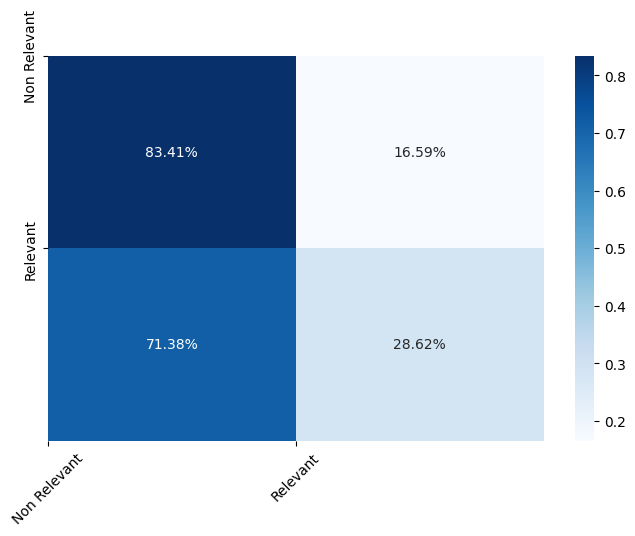

In [ ]:
#evaluation
Evaluation(y_test, y_pred, ["Non Relevant", "Relevant"])

- Performance of traditional model are worse than naivebayes.
- Lets check RNN performance

## WORD2VEC from Gensim

In [ ]:
#copying the original data
dataset = data[data.relevance != "not sure"]

def cleaning(doc):
  doc = doc.replace("</br>", " ")
  return doc

In [ ]:
#Importing lib
import gensim

#cleaning.
dataset["clean1"] = dataset["text"].apply(lambda x: clean(x))
dataset["text clean"] = dataset["clean1"].apply(lambda x: gensim.utils.simple_preprocess(x))

#splitting
X_train, X_test, y_train, y_test = train_test_split(dataset["text clean"], dataset["relevance"], test_size=0.3, random_state=42)

In [ ]:
#Mapping.
y_train = y_train.map({"yes": 1, "no":0})

In [ ]:
y_test = y_test.map({"yes": 1, "no":0})

In [ ]:
#Lets build w2v_model.
w2v_model = gensim.models.Word2Vec(X_train,
                                   vector_size=100,
                                   window=20,
                                   min_count=2)

In [ ]:
len(w2v_model.wv.index_to_key)
#Num of tokens created.

In [ ]:
#Lets see most similar word to "closely".
w2v_model.wv.most_similar("closely")

## Probelm:
- each sentence will be having different no of dims assigned with them so if we give this data for training, it will cause an error

## Solution:
- taking mean of each word in the feature section of each senetnce/ row.

In [ ]:
#visulaising the problem.
words = w2v_model.wv.index_to_key
X_train_vec = np.array([np.array([w2v_model.wv[i] for i in ls if i in words]) for ls in X_train])
X_test_vec = np.array([np.array([w2v_model.wv[i] for i in ls if i in words]) for ls in X_test])

#enumerate.
for i, v in enumerate(X_train_vec):
  if i < 20:
    print(len(X_train.iloc[i]), len(v))
  else:
    break

120 115
98 92
106 100
112 108
150 148
44 44
80 80
301 294
140 140
110 104
141 141
134 131
85 84
81 80
93 93
110 110
100 95
80 75
157 153
168 166


- we can see length of sentence : num of tokens it has.
- Also all the sentence should be of same dim to  be process through any model.

In [ ]:
#Solution.
X_train_vec_avg = []
for v in X_train_vec:
    if v.size:
        X_train_vec_avg.append(v.mean(axis=0))
    else:
        X_train_vec_avg.append(np.zeros(100, dtype=float))

X_test_vec_avg = []
for v in X_test_vec:
    if v.size:
        X_test_vec_avg.append(v.mean(axis=0))
    else:
        X_test_vec_avg.append(np.zeros(100, dtype=float))

In [ ]:
# Checking enumerate.
for i, v in enumerate(X_train_vec_avg):
  if i < 20:
    print(len(X_train.iloc[i]), len(v))
  else:
    break

120 100
98 100
106 100
112 100
150 100
44 100
80 100
301 100
140 100
110 100
141 100
134 100
85 100
81 100
93 100
110 100
100 100
80 100
157 100
168 100


- Problem resolved.
- Moving to modelling phase.

## Modelling
- base model - naivebayes
- Linear SVC
- Decision tree
- LogisticRegression
- RandomForest

## Probelm with NaiveBayes.
- It donot accept -ve integers as input
- can use pipeline in which 1st normalising the data and then using the algo.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

#Creating a pipeline
p = Pipeline([('Normalizing',MinMaxScaler()),('MultinomialNB',MultinomialNB())])
p.fit(X_train_vec_avg,y_train)

#predictions
p.score(X_test_vec_avg, y_test)

0.8156797331109258

Accuracy: 0.8127606338615513


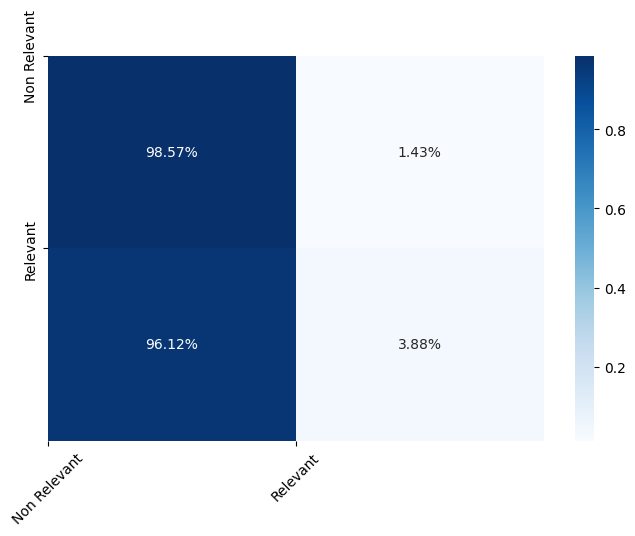

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_pred = cross_val_predict(p, X_test_vec_avg, y_test, cv=10)

#conf_mat = confusion_matrix(y_test, y_pred)

#evaluations
Evaluation(y_test, y_pred, ["Non Relevant", "Relevant"])

In [ ]:
#RandomForest model.
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(class_weight="balanced")
RF.fit(X_train_vec_avg, y_train)

#predictions
y_pred = RF.predict(X_test_vec_avg)

Accuracy: 0.8094245204336947


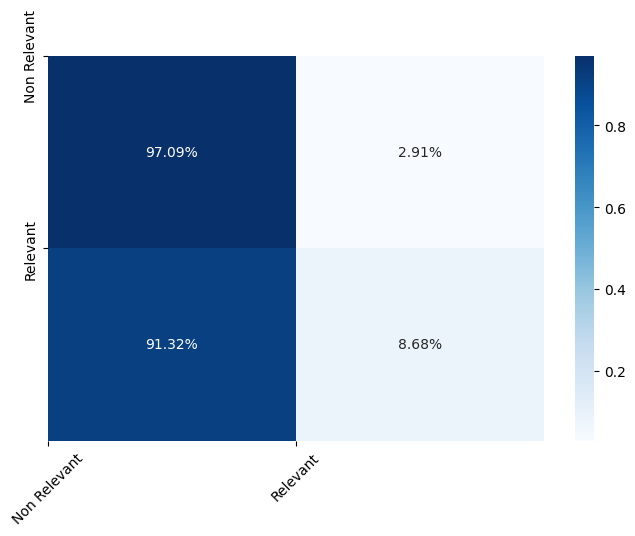

In [ ]:
#Evaluation.
Evaluation(y_test, y_pred, ["Non Relevant", "Relevant"])

In [ ]:
#LinearSVC
from sklearn.svm import LinearSVC

sv = LinearSVC(class_weight="balanced")
sv.fit(X_train_vec_avg, y_train)

#predictions
y_pred = sv.predict(X_test_vec_avg)

Accuracy: 0.6876563803169308


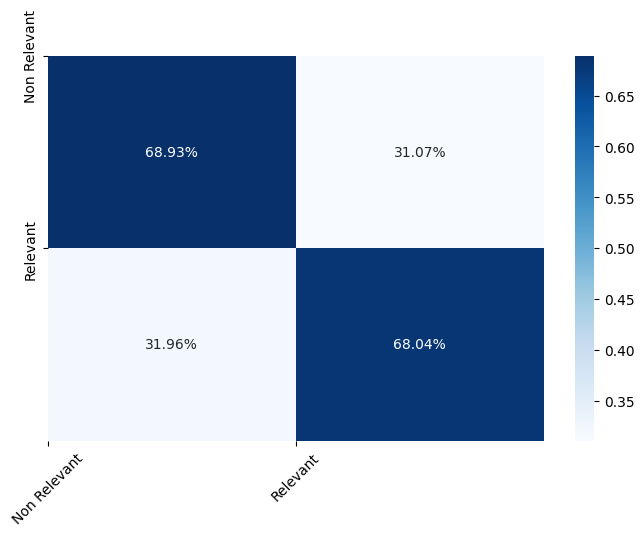

In [ ]:
#Evaluation.
Evaluation(y_test, y_pred, ["Non Relevant", "Relevant"])

- LinearSVC performing way more decent then any preevious models..

In [ ]:
#LinearSVC
from sklearn.svm import SVC

svc = SVC(class_weight="balanced")
svc.fit(X_train_vec_avg, y_train)

#predictions
y_pred = svc.predict(X_test_vec_avg)

In [ ]:
#Evaluation.
Evaluation(y_test, y_pred, ["Non Relevant", "Relevant"])

In [ ]:
#LogisticRegression.
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight="balanced", max_iter=1000)
lr.fit(X_train_vec_avg, y_train)

#prediction
y_pred = lr.predict(X_test_vec_avg)

Accuracy: 0.6843202668890742


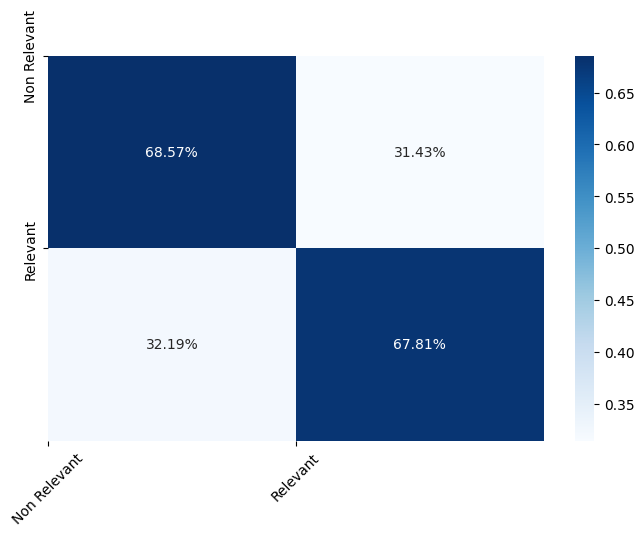

In [ ]:
#Evaluation.
Evaluation(y_test, y_pred, ["Non Relevant", "Relevant"])

In [ ]:
#SGDclassifier.
from sklearn.linear_model import SGDClassifier

SGD = SGDClassifier(class_weight="balanced")
SGD.fit(X_train_vec_avg, y_train)

#predictions
y_pred = SGD.predict(X_test_vec_avg)

Accuracy: 0.46872393661384487


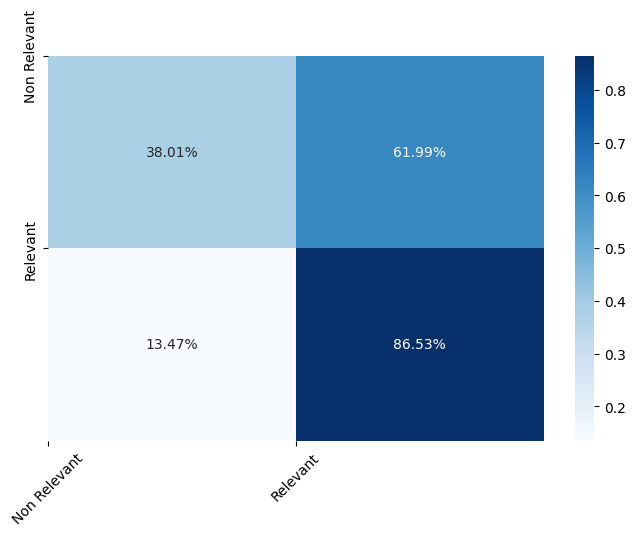

In [ ]:
#Evaluation.
Evaluation(y_test, y_pred, ["Non Relevant", "Relevant"])

In [ ]:
#Gradient Boosting classifier.
from sklearn.ensemble import GradientBoostingClassifier

GB = GradientBoostingClassifier()
GB.fit(X_train_vec_avg, y_train)

#predictions
y_pred = GB.predict(X_test_vec_avg)

Accuracy: 0.8190158465387823


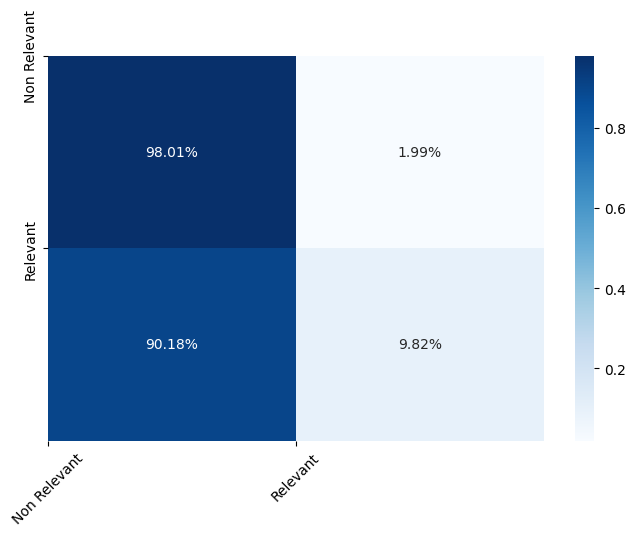

In [ ]:
#Evaluation.
Evaluation(y_test, y_pred, ["Non Relevant", "Relevant"])

## Observation
- Ensemble techniques are performing poorly for our data.

## Best Models.
- LogisticRegression
- LinearSVC
- SVC

## Moving to Hyperparameter Tuning.

In [ ]:
#importing libs
from sklearn.model_selection import  GridSearchCV

In [ ]:
from sklearn.utils import class_weight
def tuning(X, y,algo=None, fold=10):

    #parameters grid for tuning
    param_LR = {'solver' : ["newton-cg", "lbfgs", "liblinear","sag", "saga"], "class_weight":["balanced"] , "max_iter" : [100,500,1000,1500]}
    param_LSVC = {"loss": ["hinge", "squared_hinge"], "max_iter":[100,500,1000,1200,1500], "class_weight": ["balanced"]}
    param_SVC = {"gamma": ["scale", "auto"], "class_weight":["balanced"]}

    #Hyperparameter Tuning
    tune_LR = GridSearchCV(LogisticRegression(), param_LR, cv = fold)
    tune_LSVC = GridSearchCV(LinearSVC(), param_LSVC, cv = fold)
    tune_SVC = GridSearchCV(SVC(), param_SVC, cv = fold)


    #Fititng X and Y
    if algo=="LR":
      tune_LR.fit(X,y)
      print("model: ", algo)
      print('best parameters :' , tune_LR.best_params_)

    elif algo=="LSVC":
      tune_LSVC.fit(X,y)
      print("model: ", algo)
      print('best parameters :' , tune_LSVC.best_params_)

    else:
      tune_SVC.fit(X,y)
      print("model: ", algo)
      print('best parameters :' , tune_SVC.best_params_)

In [ ]:
'''
algos = ["LR","LSVC", "SVC"]
for algo in algos:
  tuning(X_train_vec_avg, y_train, algo=algo)
'''

- SVC & LSVC came out with the default params.

## post hyper-tuning performance.

In [ ]:
#LogisticRegression.
lr = LogisticRegression(class_weight="balanced", max_iter=100, solver="liblinear")
lr.fit(X_train_vec_avg, y_train)

#prediction
y_pred = lr.predict(X_test_vec_avg)

#Evaluation.
Evaluation(y_test, y_pred, ["Non Relevant", "Relevant"])

In [ ]:
#LinearSVC
sv = LinearSVC(class_weight="balanced", loss='squared_hinge', max_iter=100)
sv.fit(X_train_vec_avg, y_train)

#predictions
y_pred = sv.predict(X_test_vec_avg)

#Evaluation.
Evaluation(y_test, y_pred, ["Non Relevant", "Relevant"])

In [ ]:
#LinearSVC
svc = SVC(class_weight="balanced", gamma="scale")
svc.fit(X_train_vec_avg, y_train)

#predictions
y_pred = svc.predict(X_test_vec_avg)

#Evaluation.
Evaluation(y_test, y_pred, ["Non Relevant", "Relevant"])

- So we can observe during:
  - CountVectorizer:
    - NaiveBayes was performing best and rest of the models had an poor performance as per correct classification of relevance label is concerned.
  - Word Embeddings:
    - Models performance boosted. with normal Accuracy of almost 70%

## RNN MOdel.

In [ ]:
#Creating dataset.
df = data[data.relevance != "not sure"]

In [ ]:
#Doing cleaning.
import string

def clean(doc):
  doc = doc.replace("</br>", " ")
  doc = "".join([char for char in doc if char is not string.punctuation and not char.isdigit()])
  return doc

In [ ]:
df["text clean"] = df["text"].apply(lambda x: clean(x))

In [ ]:
#Splitting.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df["text clean"], df["relevance"], test_size=0.3, random_state=42)

- Using TextVectorization i can convert text into lower and remove punctuation from it but what about numbers?
- so this we have to seperately.

In [ ]:
#Vectorization.
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

vec = TextVectorization(max_tokens=5000, standardize='lower')
vec.adapt([X_train])

In [ ]:
#Model Agnostics.
from tensorflow.keras.layers import Embedding, Dense, LSTM, Input
from tensorflow.keras import Sequential

model = Sequential()
model.add(vec)
model.add(Embedding(input_dim=len(vec.get_vocabulary()),
                    output_dim=100,
                    mask_zero=True
                    ))
model.add(LSTM(128) )
model.add(Dense(1, activation="sigmoid"))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#labeling output.
y_train = y_train.map({"yes":1, "no":0})
y_test = y_test.map({"yes":1, "no":0})

In [ ]:
r = model.fit(X_train, y_train, validation_split=0.2, epochs=2)

Epoch 1/2
140/140 [==============================] - 171s 1s/step - loss: 0.4711 - accuracy: 0.8192 - val_loss: 0.4564 - val_accuracy: 0.8374
Epoch 2/2
140/140 [==============================] - 173s 1s/step - loss: 0.3935 - accuracy: 0.8308 - val_loss: 0.4463 - val_accuracy: 0.8275


In [ ]:
y_pred = model.predict(X_test)

75/75 [==============================] - 26s 319ms/step


In [ ]:
y_pred

array([[0.03991316],
       [0.1724508 ],
       [0.1326687 ],
       ...,
       [0.11650461],
       [0.29452264],
       [0.1263668 ]], dtype=float32)

In [ ]:
y_prob = np.where(y_pred>0.5, 1, 0)

NameError: ignored

In [ ]:
y_prob

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

Accuracy: 0.8094245204336947


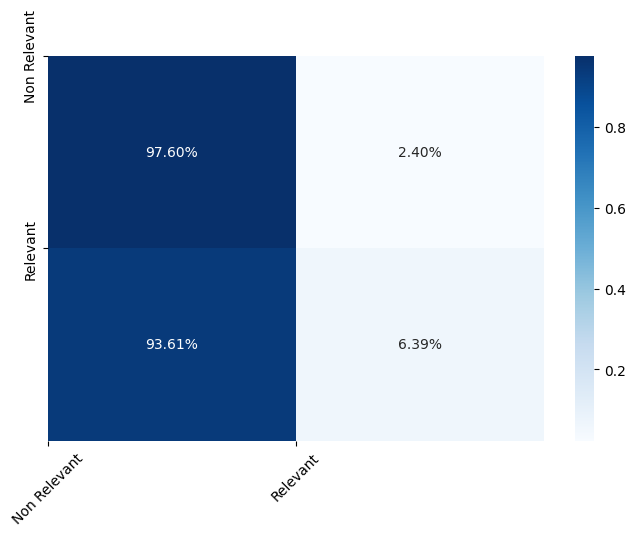

In [ ]:
Evaluation(y_test, y_prob, ["Non Relevant", "Relevant"])

In [ ]:
y_pred

array([[0.01905664],
       [0.06424072],
       [0.05156065],
       ...,
       [0.09280144],
       [0.13840795],
       [0.06147157]], dtype=float32)

## RNN with pre-trained Embeddings

In [ ]:
df = data[data.relevance != "not sure"]

In [ ]:
import string
def clean(doc):
  doc = doc.replace("</br>", " ")
  doc = " ".join([char for char in doc.split() if char not in string.punctuation and not char.isdigit()])
  return doc

In [ ]:
df["text clean"] = df["text"].map(lambda x: clean(x))

In [ ]:
#Mapping.
df["relevance"] = df["relevance"].map({"yes":1, "no":0})

In [ ]:
#Spliting.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df["text clean"], df["relevance"], test_size=0.3, random_state=42)

In [ ]:
#Custom tokenizer function.
from tensorflow.keras.preprocessing import text, sequence
from keras.preprocessing.text import Tokenizer

top_k = 5000
MAX_SEQUENCE_LENGTH = 100
class CustomTokenizer:
  def __init__(self, train_texts):
    self.train_texts = train_texts
    self.tokenizer = Tokenizer(num_words=top_k)

  def train_tokenize(self):
    max_length = len(max(self.train_texts, key=len))
    self.max_length = min(max_length, MAX_SEQUENCE_LENGTH)
    #create Vocabulary
    self.tokenizer.fit_on_texts(self.train_texts)

  def vectorize_input(self, text):
    text = self.tokenizer.texts_to_sequences(text)
    #padding and truncate.
    text = sequence.pad_sequences(text, maxlen=self.max_length, padding="post", truncating="post")

    return text

In [ ]:
#Vectorization.
tokenizer = CustomTokenizer(X_train)
tokenizer.train_tokenize()
X_train_vec = tokenizer.vectorize_input(X_train)
#same for test set.
X_test_vec = tokenizer.vectorize_input(X_test)

## Now Downloading Glove Embeddings.


In [ ]:
import os
import tqdm
import zipfile
import requests
#URL
url = "http://nlp.stanford.edu/data/glove.42B.300d.zip"

def fetch_data(url=url, target_file="glove.zip", delete_zip = False):

  #Check whether the file exists or not.
  if os.path.isfile(target_file):
    print("Dataset already downloaded :) ")

  #write some dramatic prints.
  print("*"*20)
  print("// Downloading zip file//")
  print(">_< please wait >_< ")
  print("*"*20)

  #request the file & read chunk by chunk.
  response = requests.get(url, stream=True)  #for large https request on stream mode to avoid out of memory issues
  handle = open(target_file, "wb")
  for chunk in tqdm.tqdm(response.iter_content(chunk_size=512)):
    if chunk:
      handle.write(chunk)
  handle.close()
  print("Download Complete :) ")

  #extract from zip.
  zf = zipfile.ZipFile(target_file)
  print("1. Extracting {} file".format(target_file))
  zf.extractall()

  #delete zip if true.
  if delete_zip:
    print("2. Deleting {} file".format(dataset_name+".zip"))
    os.remove(path=zip_file)

In [ ]:
fetch_data()

********************
// Downloading zip file//
>_< please wait >_< 
********************


3667580it [05:52, 10399.79it/s]


Download Complete :) 
1. Extracting glove.zip file


In [ ]:
#Creating Embedding Matrix.
import tqdm

glove_file = "glove.42B.300d.txt"
EMBEDDING_VECTOR_LENGTH = 100

def construct_embedding_matrix(glove_file, word_index):
  #Create embedding dict.
  embedding_dict = {}
  with open(glove_file, "r") as f:
    for line in f:
      values = line.split()
      word = values[0]
      if word in word_index.keys():
        vector = np.asarray(values[1:], "float32")
        embedding_dict[word] = vector

  #initialize embedding matrix
  num_words = len(word_index)+1
  embedding_matrix = np.zeros((num_words, EMBEDDING_VECTOR_LENGTH))

  #finalize embedding matix
  for word, i in tqdm.tqdm(word_index.items()):
    if i < num_words:
      vect = embedding_dict.get(word, [])
      if len(vect) > 0:
        embedding_matrix[i] = vect[:EMBEDDING_VECTOR_LENGTH]

  return embedding_matrix

In [ ]:
embedding_matrix =  construct_embedding_matrix(glove_file, tokenizer.tokenizer.word_index)

100%|██████████| 42352/42352 [00:00<00:00, 262672.73it/s]


In [ ]:
#Model Agnostics.
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras import Sequential

model = Sequential()
model.add(Embedding(len(tokenizer.tokenizer.word_index)+1,
                    EMBEDDING_VECTOR_LENGTH,
                    embeddings_initializer=tf.keras.initializers.Constant(embedding_matrix),
                    input_length=MAX_SEQUENCE_LENGTH,
                    trainable=False))
model.add(LSTM(128))
model.add(Dense(1, activation="sigmoid"))

In [ ]:
len(X_train_vec[0])

100

In [ ]:
#Compile.
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
#Training.
r = model.fit(X_train_vec, y_train, validation_split=0.2, epochs=10)

Epoch 1/10
140/140 [==============================] - 27s 190ms/step - loss: 0.4537 - accuracy: 0.8212 - val_loss: 0.4552 - val_accuracy: 0.8382
Epoch 2/10
140/140 [==============================] - 25s 178ms/step - loss: 0.4380 - accuracy: 0.8216 - val_loss: 0.4654 - val_accuracy: 0.8293
Epoch 3/10
140/140 [==============================] - 26s 185ms/step - loss: 0.4263 - accuracy: 0.8210 - val_loss: 0.4178 - val_accuracy: 0.8338
Epoch 4/10
140/140 [==============================] - 22s 159ms/step - loss: 0.4112 - accuracy: 0.8248 - val_loss: 0.4189 - val_accuracy: 0.8347
Epoch 5/10
140/140 [==============================] - 25s 175ms/step - loss: 0.4082 - accuracy: 0.8283 - val_loss: 0.4271 - val_accuracy: 0.8204
Epoch 6/10
140/140 [==============================] - 25s 177ms/step - loss: 0.3925 - accuracy: 0.8301 - val_loss: 0.4141 - val_accuracy: 0.8356
Epoch 7/10
140/140 [==============================] - 24s 170ms/step - loss: 0.3816 - accuracy: 0.8366 - val_loss: 0.4182 - val_ac

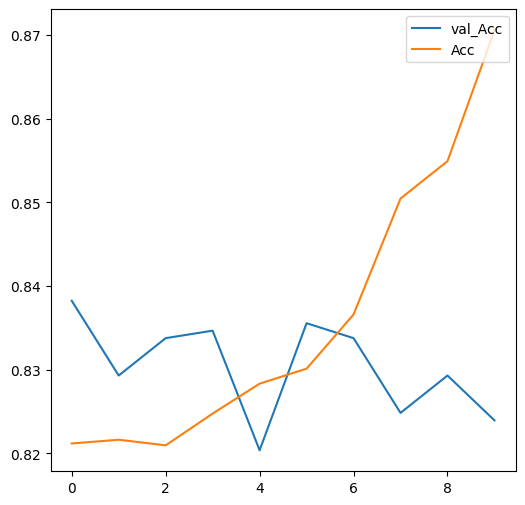

In [ ]:
#plott
plt.figure(figsize=(6,6))
plt.plot(r.history["val_accuracy"], label="val_Acc")
plt.plot(r.history["accuracy"], label="Acc")
plt.legend(loc="upper right")
plt.show()

- As we can see, our model is moving towards overfitting.
- best accuracy we can achieve by this model is around 84%.
- Things we can try:
  - Changing sequence length to a greater num as max length was over 5000.
  - Changing the dims of word vector.
  

In [ ]:
#Testing.
model.evaluate(X_test_vec, y_test)

75/75 [==============================] - 9s 115ms/step - loss: 0.4907 - accuracy: 0.7919


[0.49069955945014954, 0.79190993309021]

- Training ACC : 87,  Testing ACC: 79
- overfitting as we observed earlier.
- best num of epoch to train this model is around 5.

In [ ]:
#Evaluate.
y_pred = model.predict(X_test_vec)

75/75 [==============================] - 8s 95ms/step


Accuracy: 0.7919099249374478
Recall: 0.10730593607305935
Precision: 0.3032258064516129
F1 score: 0.15851602023608768


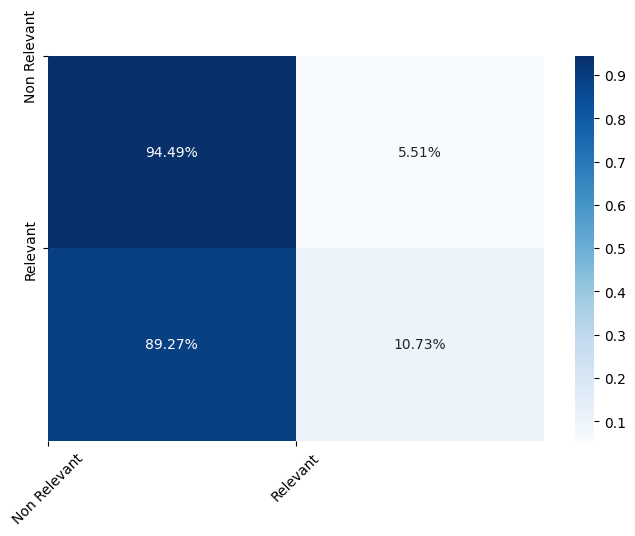

In [ ]:
#Evaluating
y_prob = np.where(y_pred>0.5, 1, 0)
Evaluation(y_test, y_prob, ["Non Relevant", "Relevant"])